In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
dataset = pd.read_csv("data.csv")
dataset.head()
stock = dataset

In [3]:
stock.Date = pd.to_datetime(stock.Date, format='%Y%m%d', errors='ignore')



In [4]:
import talib
stock['RSI'] = talib.RSI(stock['Close'].values, timeperiod = 14)

In [5]:
stock = stock.dropna()
stock = stock[['Date','Open', 'High', 'Low', 'Close','RSI']]
    

In [6]:

stock.head()
stock.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
RSI      0
dtype: int64

In [7]:
stock = stock.groupby('Date')['RSI'].sum().reset_index()
stock.head()

,Date,RSI
0,2012-01-23,42.086331
1,2012-01-25,43.186754
2,2012-01-26,41.488807
3,2012-01-29,41.488807
4,2012-01-31,44.524284


In [8]:

stock = stock.set_index('Date')
stock.index

Index(['2012-01-23', '2012-01-25', '2012-01-26', '2012-01-29', '2012-01-31',
       '2012-02-01', '2012-02-02', '2012-02-05', '2012-02-06', '2012-02-07',
       ...
       '2020-03-05', '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-15',
       '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-22'],
      dtype='object', name='Date', length=1887)

In [9]:
stock.index = pd.to_datetime(stock.index)

monthly_mean = stock.RSI.resample('M').mean()

In [10]:
monthly_mean['2018':]

Date
2018-01-31    36.694348
2018-02-28    50.057825
2018-03-31    35.501371
2018-04-30    49.867463
2018-05-31    46.150352
2018-06-30    32.574163
2018-07-31    33.405896
2018-08-31    53.720629
2018-09-30    63.699985
2018-10-31    45.125483
2018-11-30    37.938116
2018-12-31    32.244231
2019-01-31    37.595880
2019-02-28    31.936717
2019-03-31    30.244470
2019-04-30    66.296602
2019-05-31    59.567011
2019-06-30    40.896099
2019-07-31    45.464640
2019-08-31    37.193520
2019-09-30    41.230286
2019-10-31    47.516133
2019-11-30    39.707492
2019-12-31    40.671062
2020-01-31    52.787109
2020-02-29    59.561085
2020-03-31    51.457010
Freq: M, Name: RSI, dtype: float64

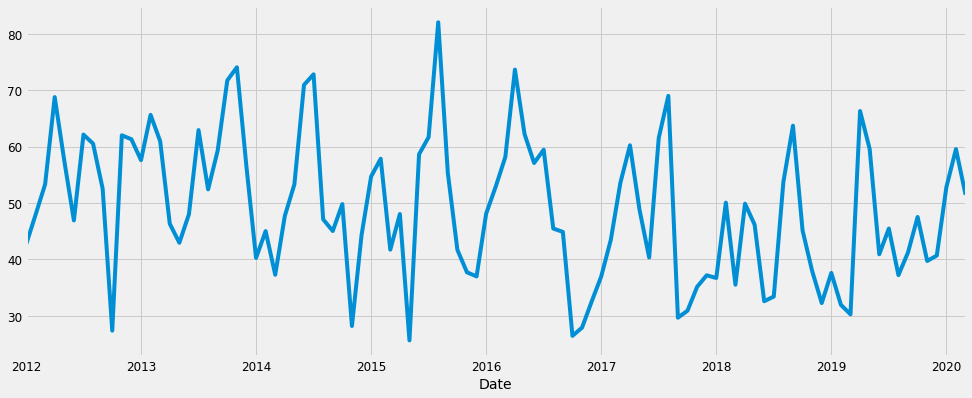

In [11]:
monthly_mean.plot(figsize=(15, 6))
plt.show()

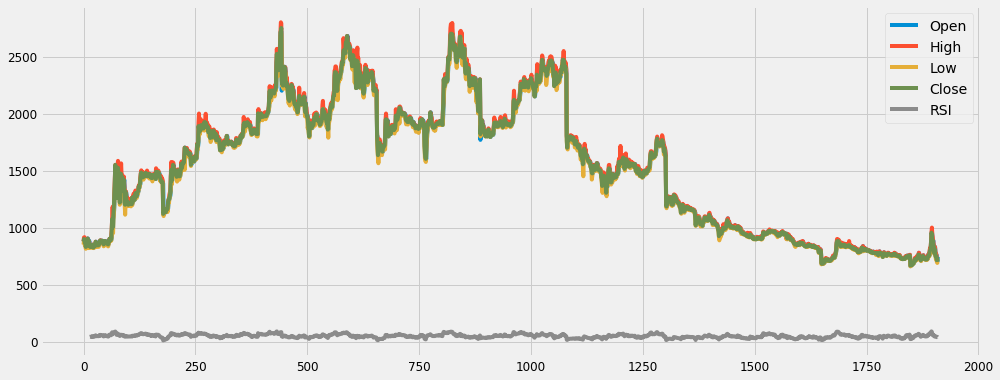

In [12]:
dataset.plot(figsize=(15, 6))
plt.show()

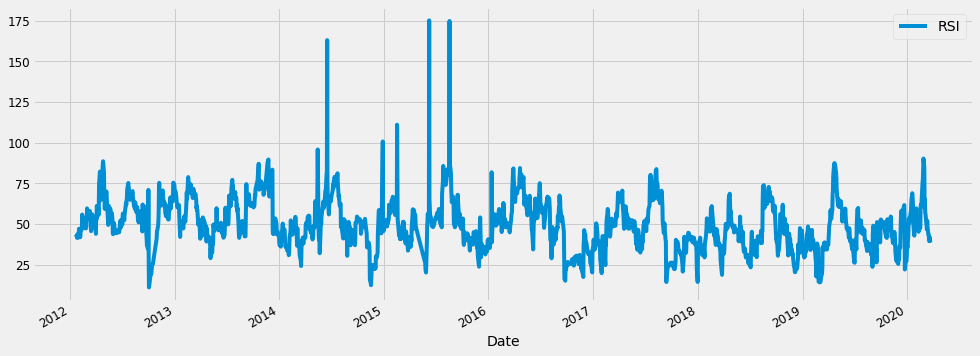

In [13]:
stock.plot(figsize=(15, 6))
plt.show()


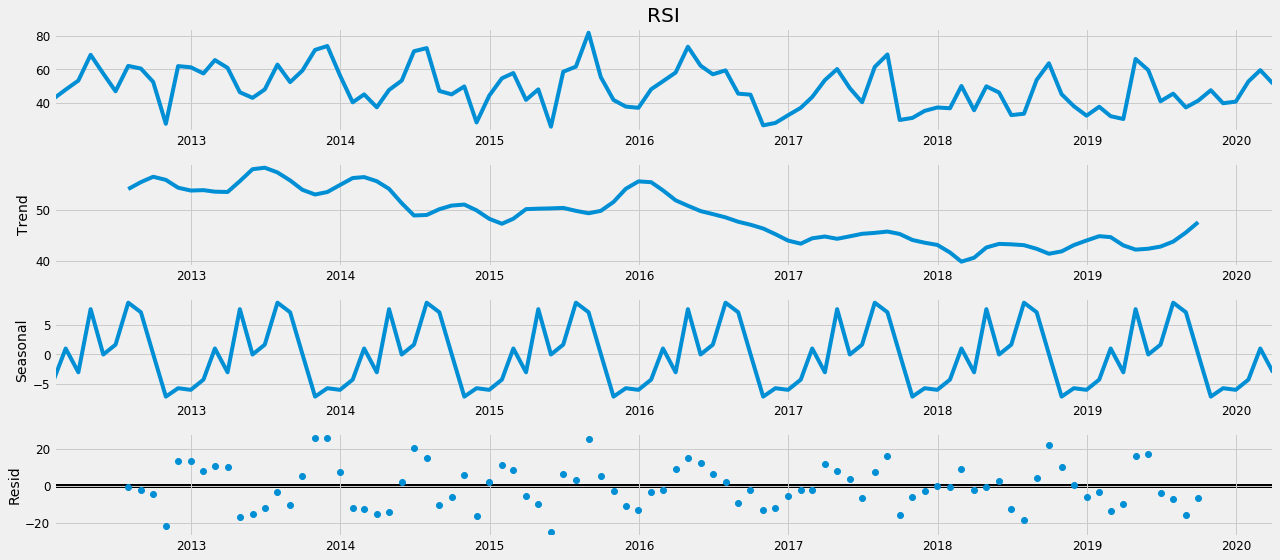

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_mean, model='additive')
fig = decomposition.plot()
plt.show()

In [15]:

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1049.67408915699
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:857.7190757809774
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:728.4823493452856
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:599.1450294374202
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:734.9316102335583
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:692.8989909453679
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:612.9450550588926
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:605.8398105515793
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:944.9038553279534
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:787.9058780914681
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:704.8206987446404
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:577.4164202123231
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:717.917177461259
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:670.8279827269578
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:602.1722684932641
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:578.5938199266848
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:778.338357001675
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:680.2339636460796
ARIMA(0, 1, 0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:687.8340933321815
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:714.2312653098123
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:583.7315075585052
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:687.9025206994654
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:680.5206659508577
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:594.3047822709049
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:589.8904928888912
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:766.0315321838877
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:680.559906776161
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:705.895078109911
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:577.6363111739485
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:688.1013095858325
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:672.2501787222774
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:595.4691467855065
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:582.3650827209811
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:778.0801236118682
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:680.8926525613547
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:734.3533420170605
ARIMA(1, 1, 

In [17]:
minimum=l_results_aic[0]
for i in l_results_aic[1:]:
    if i < minimum: 
        minimum = i
i=l_results_aic.index(minimum)

In [18]:
mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3756      0.184      2.039      0.041       0.015       0.737
ma.L1         -1.0000   1286.289     -0.001      0.999   -2522.079    2520.079
ma.S.L12      -1.0000   1341.225     -0.001      0.999   -2629.753    2627.753
sigma2       109.8726   1.98e+05      0.001      1.000   -3.88e+05    3.88e+05


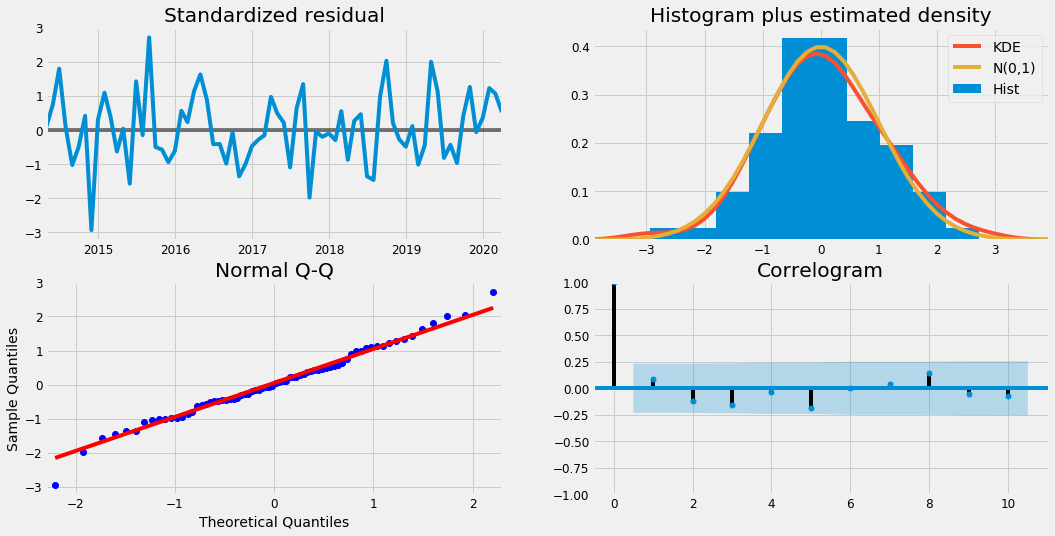

In [19]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

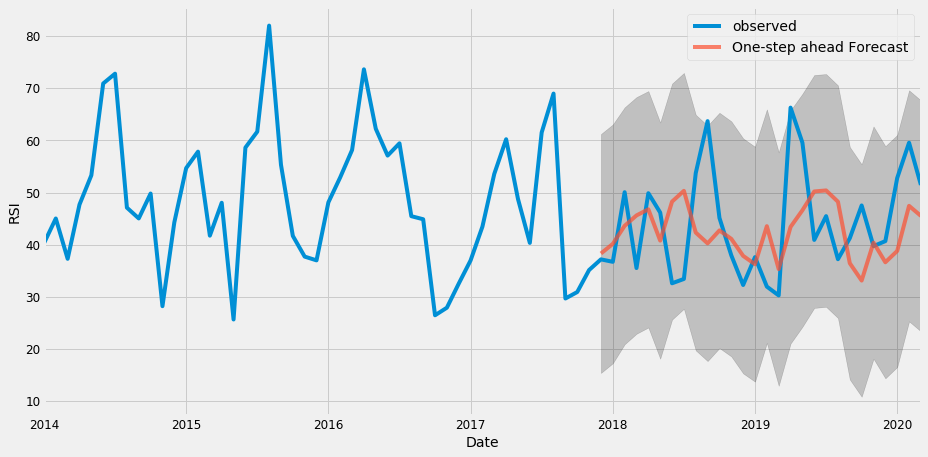

In [20]:
pred = results.get_prediction(start=pd.to_datetime('2017-12-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = monthly_mean['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('RSI')
plt.legend()

plt.show()

In [21]:
y_forecasted = pred.predicted_mean
y_truth = monthly_mean['2018-12-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 109.11


In [22]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 10.45


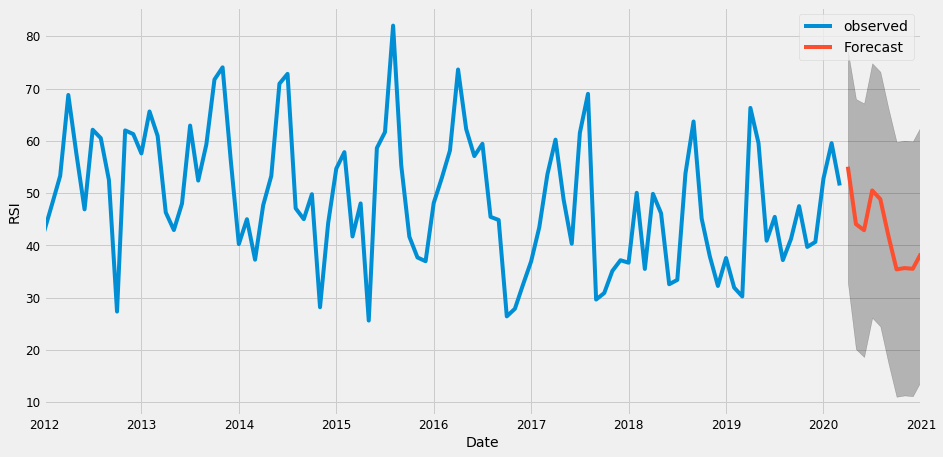

In [23]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()

ax = monthly_mean.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('RSI')

plt.legend()
plt.show()

In [24]:
print(pred_ci)

            lower RSI  upper RSI
2020-04-30  32.905721  77.208101
2020-05-31  20.167430  67.992198
2020-06-30  18.664666  67.150379
2020-07-31  26.181314  74.828596
2020-08-31  24.509776  73.205705
2020-09-30  17.473253  66.185764
2020-10-31  11.058764  59.777265
2020-11-30  11.307586  60.028304
2020-12-31  11.167795  59.889342
2021-01-31  14.062411  62.784277
